<img width="800" height="500"  src="Resources/Project_Header.png">

### Simulating Data
Data is simulated for many different reasons, in the context of the simulation I will be completing into generating some data on child birth variables like gestation period, gender, birth weight etc. I will be coding the data in such a way that the number of lines generated by the code can be altered by entering an integer at the start of notebook.

From this data that has been generated programatically analysis can be coducted into the different variables and there relationships with each other. For example birth weights can be impacted by amongst other things the gender and the gestation period with higher gestation periods resulting in a larger birth weight.

Having this data available and simulating the data could also be used in predicting outcomes or in conducting what if analysis. Whereby based on the data predictions could be made on the health of the population for generations to come and possibly into the likelihood of developing diabetes. 

For example if a relationship was hypothesised between birth weight and the chances of developing diabetes simulations could quickly be conducted with some additional related variables to help determine and prove this link.

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn

Below code will be used so that the number of Irish children born can be simulated up to any positive integer, code to ensure number entered into variable is a positive integer adapted from [here.](https://www.quora.com/How-can-I-make-sure-the-user-inputs-a-positive-integer-in-Python)

In [2]:
# code below adapted from above link which prevents numbers less than 0 and non numeric characters being entered.

while True:
	try:
		number_births = int(input("Please enter the number of Irish births you would like to simulate: "))
		assert(number_births>0)
		break
	except:
		print("The number of births must be a positive integer, please try again.")

Please enter the number of Irish births you would like to simulate: 500


### Create Gender Data
After some initial research my simulation will focus on first time parents becasue as the birth order increases this can have an affect on the gender ratio of the child being born as discussed in (Ritchie & Roser, 2019). As the birth order increases there is a bias in favour of females being born, it may be possible to build this variation into my simulation however further research is required first.

The paper relating to the data used in the website by (Ritchie & Roser, 2019) on gender ratios is based off of the study completed (Chao, et al., 2019) , for the generation of the gender data used to validate there sample the authors used a normal distribution. This will also be the distribution I will use in the generation of the gender of the children born in my simulaiton.

In [3]:
gender_number = np.random.normal(loc=0.0, scale=1.0, size=number_births)

After generating the random numbers that I will use as the basis for determining the gender of the children in my simulation I plotted the data in a histogram to confirm the normal distribution of the data. I will create a text column that is linked to this number whereby numbers greater than 0 will be male and less than will be females.

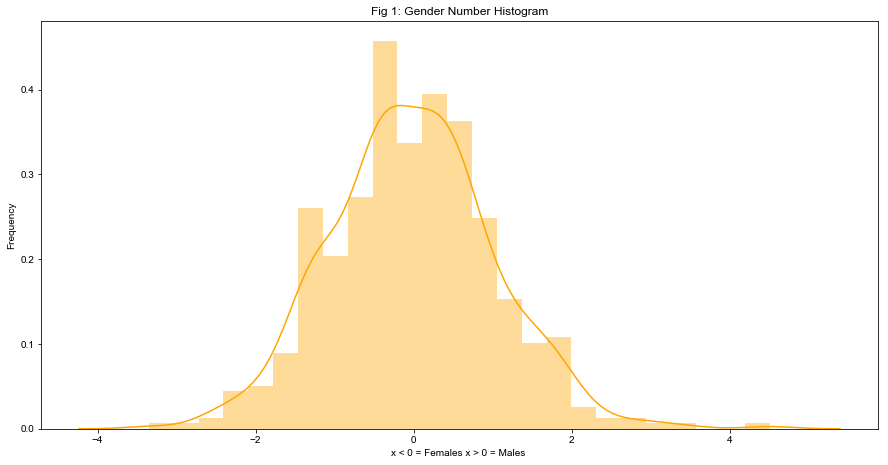

In [4]:
plt.rcParams["figure.figsize"] = (15,7.5)

sbn.distplot(gender_number, color='orange')
sbn.set_style("darkgrid")
plt.title('Fig 1: Gender Number Histogram')
plt.xlabel('x < 0 = Females x > 0 = Males ')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Convert from numpy array to pandas dataframe, this dataframe will house the data for my final submission

birth_data = pd.DataFrame(gender_number)
birth_data.columns = ['gender_number']

Code to create text of gender based on values gender number column adapted from [here.](https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column)

In [6]:
birth_data['gender_text'] = np.where(birth_data['gender_number']>0, 'Male', 'Female')
print(birth_data)

     gender_number gender_text
0         0.437421        Male
1         0.303986        Male
2        -0.389586      Female
3        -1.460961      Female
4         3.069418        Male
5        -0.426969      Female
6         0.298260        Male
7         2.416879        Male
8        -0.540096      Female
9        -0.490190      Female
10       -0.956603      Female
11       -0.856185      Female
12       -1.465057      Female
13       -1.426273      Female
14       -0.606437      Female
15       -0.830283      Female
16        0.260624        Male
17       -1.155727      Female
18       -1.430453      Female
19       -1.427526      Female
20        1.885096        Male
21        0.274483        Male
22       -0.960601      Female
23       -0.541126      Female
24       -0.092780      Female
25        0.171956        Male
26       -0.009624      Female
27        0.784221        Male
28       -1.337658      Female
29       -0.061312      Female
..             ...         ...
470     

### Create Gestation Length Data

Gestation period plays a huge role in the birth weight that a child will be when it is born, (Jukic, et al., 2013) describes several start points for starting the counting of days of gestation. For my analysis I will be using the Last Menstrual Period (LMP) as my start point for measuring the number of days of gestation.

The mean and standard deviation required to generate the gestational data were taken from (Jukic, et al., 2013), the type of distribution that represents gestation period can be seen in (Nassar, et al., 2013). 

Figure 1 taken from (Nassar, et al., 2013) shows the curve of the gestation period over the years 1994-2009 for Australian births, the resulting curve for 2009 apppears to follow a standard normal distribution.


![Figure 1](Resources/Figure_1.png)
**Figure 1**




For my simulation I will generate data for gestational period in days that follows this kind of curve.

In [7]:
# Mean 285 Standar Deviation 14 as per Table I (Jukic, et al., 2013)
# Numbers divided by 7 in order to get number of weeks to be used in birth weight calculation

birth_data['gestation_period'] = np.random.normal(loc=285, scale=14, size=number_births)/7

# Round Gestation Period to nearest whole number
birth_data['gestation_period'] = birth_data['gestation_period'].round(0)

In [8]:
birth_data.describe()

,gender_number,gestation_period
count,500.000000,500.000000
mean,-0.018205,40.798000
std,1.040703,1.956746
min,-3.350366,35.000000
25%,-0.683580,40.000000
50%,-0.031033,41.000000
75%,0.615655,42.000000
max,4.512585,46.000000


I spoke with a colleague in work on my project and gave her a look at what I was trying to simulate in my project, from this interaction she advised that generally labour is induced no later than 42 weeks into gestation.


After this chat I did some research and found that gestation in Ireland does not usually be allowed to go further than 42 weeks as discussed in (Association for Improvements in the Maternity Services - Ireland, 2014). On the website they discuss commencing the inducing of labour by week 40 in gestation.

As the above reference also mentions labours up to 42 weeks I believe it safe to assume that the gestation will not go over the 42 week mark, therefore I will reduce any of my values above 42 weeks to 42 weeks using the below code.

In [9]:
birth_data['gestation_period'] = np.where(birth_data['gestation_period']>42.0, 42.0, birth_data['gestation_period'] )
print(birth_data)

     gender_number gender_text  gestation_period
0         0.437421        Male              42.0
1         0.303986        Male              42.0
2        -0.389586      Female              42.0
3        -1.460961      Female              42.0
4         3.069418        Male              42.0
5        -0.426969      Female              42.0
6         0.298260        Male              41.0
7         2.416879        Male              40.0
8        -0.540096      Female              41.0
9        -0.490190      Female              40.0
10       -0.956603      Female              42.0
11       -0.856185      Female              40.0
12       -1.465057      Female              40.0
13       -1.426273      Female              42.0
14       -0.606437      Female              39.0
15       -0.830283      Female              42.0
16        0.260624        Male              40.0
17       -1.155727      Female              42.0
18       -1.430453      Female              41.0
19       -1.427526  

In [10]:
birth_data.describe()

,gender_number,gestation_period
count,500.000000,500.0000
mean,-0.018205,40.4820
std,1.040703,1.5344
min,-3.350366,35.0000
25%,-0.683580,40.0000
50%,-0.031033,41.0000
75%,0.615655,42.0000
max,4.512585,42.0000


### Create Weight Data

The study carried out in (Charnigo, et al., 2010) set out to model the distributions of birth weights in children. The author goes on to explain that different components of data can have an influence on the shape of the distributions such as smoking preference and ethnicity to name two.

For the purpose of this simulation as highlighted by the author of the above study I will be using a noraml distribution as thre are far too many components to account for all instances but I will use a different mean for either genders and the gestation age in the generation of the data.

In there study (Janssen, et al., 2007) descibed the mean and standard deviations of birth weights broken out by gestation period and gender, table 1 is taken from this study. 

For generating my data I will be using the european baby data, for gestation periods in my simulated data above 41 weeks and below 37 weeks I will combine them with the closest week number I have data for.


**Table 1**
![Table_1](Resources/Table_1.png)

Code to create new column in datafram using apply function adapted from [here](https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns).

In [11]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=3336.4, scale=434.3, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3359.4, scale=416.3, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3586.0, scale=460.3, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3687.6, scale=410.5, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3877.1, scale=384.4, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=3050.7, scale=414.1, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=3293.5, scale=423.3, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=3455.8, scale=434, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=3639.5, scale=458.2, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=3696.8, scale=448, size=None)
  else: return 0

birth_data['birth_weight'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_weight'] = birth_data['birth_weight'].round(0)

### Create Length Data

Birth length is another important vairable when it comes to newborns and is monitored througout the development of the child, in there study (Janssen, et al., 2007)  also went on to describe the mean length and standard deviation of newborns by gender.

I will attempt to simulate this data also by generating the birth length in cm's for the newborns in my simulation utilising the normal distribution along with using gender and gestation age to impact the length at birth. Again the data used to generate the length of the children can be found above in table 1.

In [12]:
def f(birth_data):
  if birth_data['gender_text'] == "Male" and birth_data['gestation_period'] <= 37.0: return np.random.normal(loc=49.4, scale=2, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=49.4, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=50.5, scale=1.9, size=None)  
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=50.8, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Male" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=51.4, scale=2.2, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] <= 37 : return np.random.normal(loc=47.4, scale=2.5, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 38 : return np.random.normal(loc=48.6, scale=1.8, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 39 : return np.random.normal(loc=49.4, scale=1.7, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] == 40 : return np.random.normal(loc=50.2, scale=1.8, size=None)
  elif birth_data['gender_text'] == "Female" and birth_data['gestation_period'] >= 41 : return np.random.normal(loc=50.5, scale=1.6, size=None)
  else: return 0

birth_data['birth_length'] = birth_data.apply(f, axis=1)

# Round birth weight to 0 decimals
birth_data['birth_length'] = birth_data['birth_length'].round(1)

In [13]:
print(birth_data)

     gender_number gender_text  gestation_period  birth_weight  birth_length
0         0.437421        Male              42.0        3459.0          53.5
1         0.303986        Male              42.0        4259.0          49.2
2        -0.389586      Female              42.0        3762.0          53.8
3        -1.460961      Female              42.0        4140.0          51.1
4         3.069418        Male              42.0        4178.0          51.3
5        -0.426969      Female              42.0        3866.0          51.1
6         0.298260        Male              41.0        4618.0          52.9
7         2.416879        Male              40.0        3935.0          49.5
8        -0.540096      Female              41.0        3584.0          49.1
9        -0.490190      Female              40.0        3382.0          47.8
10       -0.956603      Female              42.0        3378.0          53.6
11       -0.856185      Female              40.0        4050.0          50.0

In [14]:
birth_data.describe()

,gender_number,gestation_period,birth_weight,birth_length
count,500.000000,500.0000,500.000000,500.000000
mean,-0.018205,40.4820,3673.112000,50.575200
std,1.040703,1.5344,475.182171,2.045079
min,-3.350366,35.0000,2107.000000,44.100000
25%,-0.683580,40.0000,3377.250000,49.300000
50%,-0.031033,41.0000,3680.000000,50.600000
75%,0.615655,42.0000,4001.000000,51.900000
max,4.512585,42.0000,5175.000000,59.100000


### References

Association for Improvements in the Maternity Services - Ireland, 2014. INDUCTION OF LABOUR – IS IT RIGHT FOR YOU?. [Online] 
Available at: http://aimsireland.ie/induction-of-labour-is-it-right-for-you/
[Accessed 11 Dec 2019].

Central Statistics Office Ireland, Unknown. Vital Statistics Annual Report 2017 - Births 2017, Dublin: Central Statistics Office Ireland.

Chao, F., Gerland, P., Cook, A. R. & Alkema, L., 2019. Systematic assessment of the sex ratio at birth for all countries and estimation of national imbalances and regional reference levels. PNAS, 116(19), pp. 9303 - 9311.

Charnigo, R., Chesnut, L. W., LoBianco, T. & Kirby, R. S., 2010. Thinking outside the curve, part I: modeling birthweight distribution. BMC, 28 Jul.10(37).

Janssen, P. A. et al., 2007. Standards for the measurement of birth weight, length and head circumference at term in neonates of European, Chinese and South Asian ancestry. Open Medicine, 10 Jul, 1(2), pp. 74-88.

Jukic, A. M. et al., 2013. Length of human pregnancy and contributors to its natural variation. Human Reproduction, 6 Aug, 28(10), pp. 2848 - 2855.

Nassar, N., Schiff, M. & Roberts, C. L., 2013. Trends in the Distribution of Gestational Age and Contribution of Planned Births in New South Wales, Australia. PLoS One, `20 Feb, 8(2), p. 56238.
Office for National Statistics UK, 2019. Birth characteristics in England and Wales: 2017. [Online] 
Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/bulletins/birthcharacteristicsinenglandandwales/2017
[Accessed 09 Dec 2019].

Office for National Statistics UK, 2019. Standard deviation of the mean age of mother at 1st, 2nd, 3rd, 4th and 5th birth, 1969 to 2017, England and Wales. [Online] 
Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/livebirths/adhocs/009572standarddeviationofthemeanageofmotherat1st2nd3rd4thand5thbirth1969to2017englandandwales
[Accessed 09 Dec 2019].

Ritchie, H. & Roser, M., 2019. Gender Ratio. [Online] 
Available at: https://ourworldindata.org/gender-ratio
[Accessed 01 Onward December 2019].

Walsh, A.-M., 2008. Big is beautiful as experts dispel 'sumo baby' myth. [Online] 
Available at: https://www.independent.ie/irish-news/big-is-beautiful-as-experts-dispel-sumo-baby-myth-26454311.html
[Accessed 01 Onward December 2019].

Walsh, A.-M., 2019. Irish birth rate still high but first-time mothers are among oldest in EU. [Online] 
Available at: https://www.independent.ie/irish-news/health/irish-birth-rate-still-high-but-firsttime-mothers-are-among-oldest-in-eu-37908011.html
[Accessed 09 Dec 2019].

